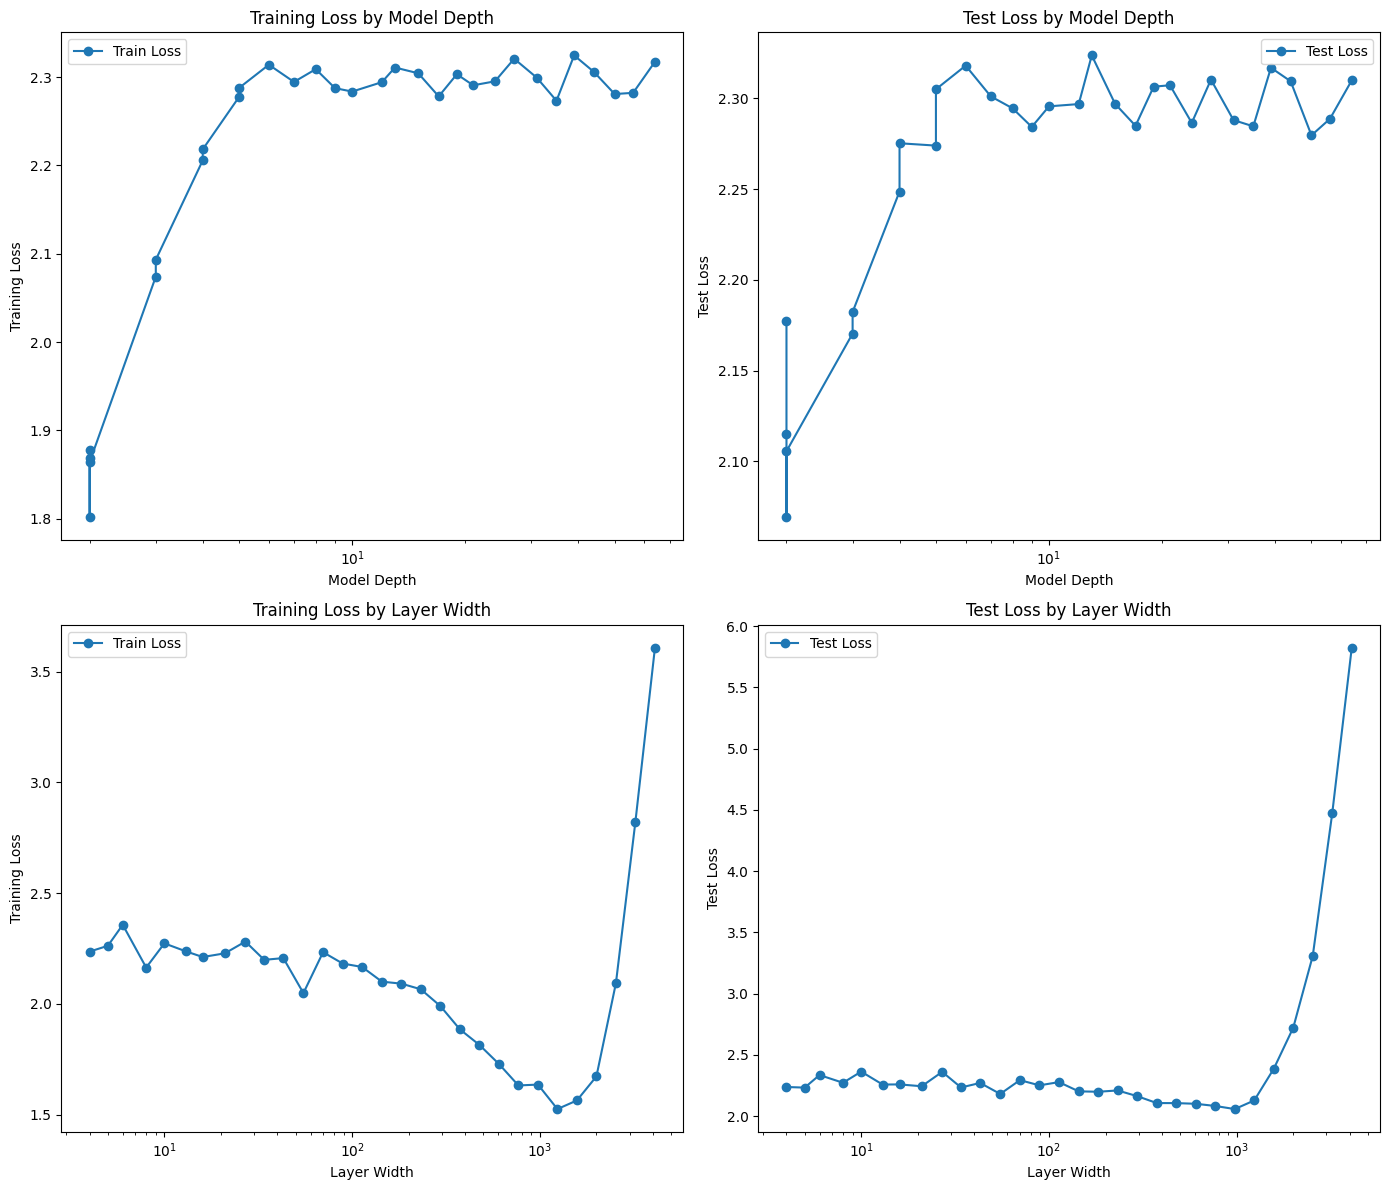

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import numpy as np

# Set seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load MNIST data with PyTorch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Select 10 examples for training and 10 for testing (without shuffling)
train_samples = 10
test_samples = 10
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=train_samples, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=test_samples, shuffle=False)

# Extract a single batch of 10 examples for both train and test sets
train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

# Define the model classes for varying depth and width
class DepthModel(nn.Module):
    def __init__(self, depth, width=128):
        super(DepthModel, self).__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.ModuleList([nn.Linear(28 * 28, width)])
        self.layers.extend([nn.Linear(width, width) for _ in range(depth - 2)])
        self.layers.append(nn.Linear(width, 10))

    def forward(self, x):
        x = self.flatten(x)
        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))
        x = self.layers[-1](x)
        return x

class WidthModel(nn.Module):
    def __init__(self, width, depth=3):
        super(WidthModel, self).__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.ModuleList([nn.Linear(28 * 28, width)])
        self.layers.extend([nn.Linear(width, width) for _ in range(depth - 2)])
        self.layers.append(nn.Linear(width, 10))

    def forward(self, x):
        x = self.flatten(x)
        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))
        x = self.layers[-1](x)
        return x

# Define logarithmic scales with more points in lower ranges
depth_sizes = np.logspace(1, 6, num=30, base=2, dtype=int)   # 30 points for depth, up to 64 layers, balanced on log scale
width_sizes = np.logspace(2, 12, num=30, base=2, dtype=int)  # 30 points for width, up to 4,096,000 neurons, balanced on log scale

# Containers for losses
train_losses_depth, test_losses_depth = [], []
train_losses_width, test_losses_width = [], []

# Depth Experiment
for depth in depth_sizes:
    model = DepthModel(depth)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train on the 10 training examples (single step)
    model.train()
    outputs = model(train_images)
    loss = criterion(outputs, train_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Calculate training loss on the 10 training examples
    with torch.no_grad():
        train_output = model(train_images)
        train_loss = criterion(train_output, train_labels).item()
    
    # Calculate test loss on the 10 held-out test examples
    test_output = model(test_images)
    test_loss = criterion(test_output, test_labels).item()
    
    # Append the losses
    train_losses_depth.append(train_loss)
    test_losses_depth.append(test_loss)

# Width Experiment
for width in width_sizes:
    model = WidthModel(width)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train on the 10 training examples (single step)
    model.train()
    outputs = model(train_images)
    loss = criterion(outputs, train_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Calculate training loss on the 10 training examples
    with torch.no_grad():
        train_output = model(train_images)
        train_loss = criterion(train_output, train_labels).item()
    
    # Calculate test loss on the 10 held-out test examples
    test_output = model(test_images)
    test_loss = criterion(test_output, test_labels).item()
    
    # Append the losses
    train_losses_width.append(train_loss)
    test_losses_width.append(test_loss)

# Plotting the results
plt.figure(figsize=(14, 12))

# Training loss by Depth
plt.subplot(2, 2, 1)
plt.plot(depth_sizes, train_losses_depth, marker='o', label="Train Loss")
plt.xscale('log')
plt.xlabel("Model Depth")
plt.ylabel("Training Loss")
plt.title("Training Loss by Model Depth")
plt.legend()

# Test loss by Depth
plt.subplot(2, 2, 2)
plt.plot(depth_sizes, test_losses_depth, marker='o', label="Test Loss")
plt.xscale('log')
plt.xlabel("Model Depth")
plt.ylabel("Test Loss")
plt.title("Test Loss by Model Depth")
plt.legend()

# Training loss by Width
plt.subplot(2, 2, 3)
plt.plot(width_sizes, train_losses_width, marker='o', label="Train Loss")
plt.xscale('log')
plt.xlabel("Layer Width")
plt.ylabel("Training Loss")
plt.title("Training Loss by Layer Width")
plt.legend()

# Test loss by Width
plt.subplot(2, 2, 4)
plt.plot(width_sizes, test_losses_width, marker='o', label="Test Loss")
plt.xscale('log')
plt.xlabel("Layer Width")
plt.ylabel("Test Loss")
plt.title("Test Loss by Layer Width")
plt.legend()

plt.tight_layout()
plt.show()


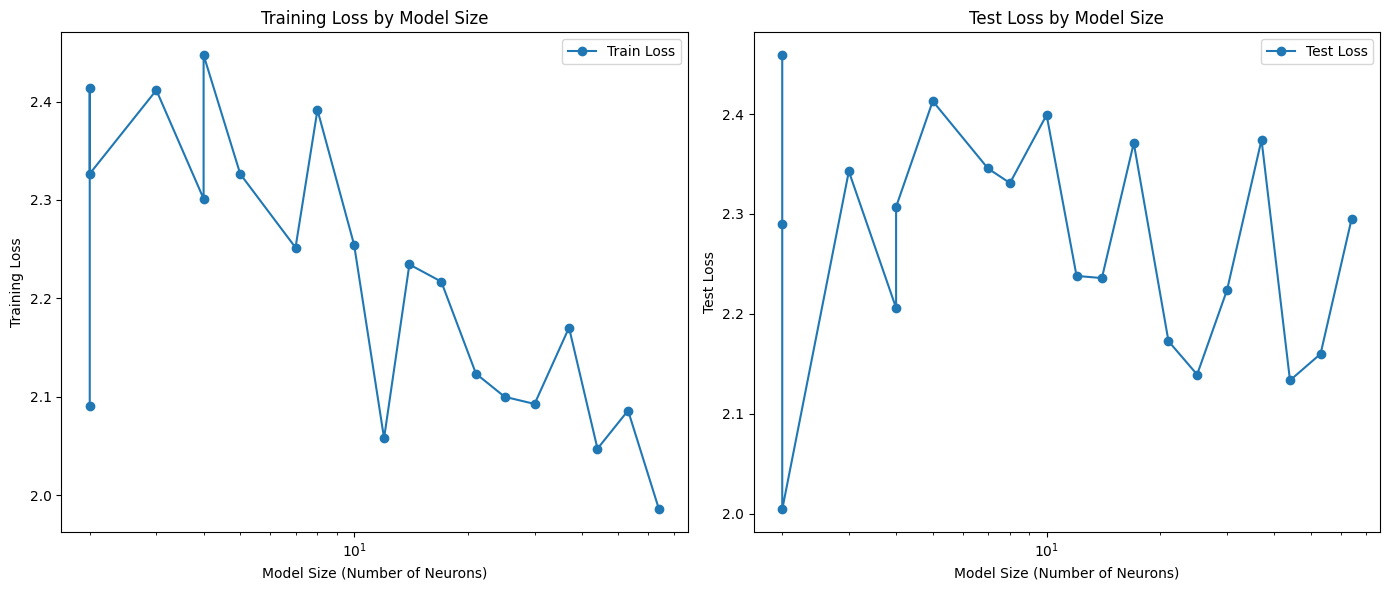

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import numpy as np
# Load MNIST data with PyTorch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Select 10 examples for training and 10 for testing
train_samples = 10
test_samples = 10
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=train_samples, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=test_samples, shuffle=True)

# Extract a single batch of 10 examples for both train and test sets
train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

# Define a function to build models with varying number of parameters
class SimpleModel(nn.Module):
    def __init__(self, input_size):
        super(SimpleModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, input_size)
        self.fc2 = nn.Linear(input_size, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model sizes (number of neurons in the hidden layer)
layer_sizes = np.logspace(1, 6, num=20, base=2, dtype=int)

# Containers for the losses
train_losses = []
test_losses = []

# Train and test each model
for size in layer_sizes:
    model = SimpleModel(size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train on the 10 training examples (single step)
    model.train()
    outputs = model(train_images)
    loss = criterion(outputs, train_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Calculate training loss on the 10 training examples
    with torch.no_grad():
        train_output = model(train_images)
        train_loss = criterion(train_output, train_labels).item()
    
    # Calculate test loss on the 10 held-out test examples
    test_output = model(test_images)
    test_loss = criterion(test_output, test_labels).item()
    
    # Append the losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plotting the results
plt.figure(figsize=(14, 6))

# Training loss plot
plt.subplot(1, 2, 1)
plt.plot(layer_sizes, train_losses, marker='o', label="Train Loss")
plt.xscale('log')
plt.xlabel("Model Size (Number of Neurons)")
plt.ylabel("Training Loss")
plt.title("Training Loss by Model Size")
plt.legend()

# Test loss plot
plt.subplot(1, 2, 2)
plt.plot(layer_sizes, test_losses, marker='o', label="Test Loss")
plt.xscale('log')
plt.xlabel("Model Size (Number of Neurons)")
plt.ylabel("Test Loss")
plt.title("Test Loss by Model Size")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import numpy as np

# Load MNIST data with PyTorch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Select 10 examples for training and 10 for testing
train_samples = 10
test_samples = 10
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=train_samples, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=test_samples, shuffle=True)

# Extract a single batch of 10 examples for both train and test sets
train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

# Define the function for the medium fixed-depth model with varying layer widths
class WideModel(nn.Module):
    def __init__(self, width):
        super(WideModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, width)
        self.fc2 = nn.Linear(width, width)
        self.fc3 = nn.Linear(width, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define layer widths to test, from practical to impractically large widths
layer_widths = np.logspace(2, 6, num=10, base=2, dtype=int)

# Containers for the new losses
train_losses_width = []
test_losses_width = []

# Train and test each model with increasing width
for width in layer_widths:
    model = WideModel(width)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train on the 10 training examples (single step)
    model.train()
    outputs = model(train_images)
    loss = criterion(outputs, train_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Calculate training loss on the 10 training examples
    with torch.no_grad():
        train_output = model(train_images)
        train_loss = criterion(train_output, train_labels).item()
    
    # Calculate test loss on the 10 held-out test examples
    test_output = model(test_images)
    test_loss = criterion(test_output, test_labels).item()
    
    # Append the losses
    train_losses_width.append(train_loss)
    test_losses_width.append(test_loss)

# Plotting the results
plt.figure(figsize=(14, 6))

# Training loss plot
plt.subplot(1, 2, 1)
plt.plot(layer_widths, train_losses_width, marker='o', label="Train Loss")
plt.xscale('log')
plt.xlabel("Layer Width")
plt.ylabel("Training Loss")
plt.title("Training Loss by Layer Width")
plt.legend()

# Test loss plot
plt.subplot(1, 2, 2)
plt.plot(layer_widths, test_losses_width, marker='o', label="Test Loss")
plt.xscale('log')
plt.xlabel("Layer Width")
plt.ylabel("Test Loss")
plt.title("Test Loss by Layer Width")
plt.legend()

plt.tight_layout()
plt.show()
